In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import describe, normaltest
import matplotlib.pyplot as plt

data1 = "1_paid_marketing.csv"
data2 = "2_hcp_data.csv"
data3 = "3_shifts_data.csv"
campaigns = pd.read_csv(data1)
hcp = pd.read_csv(data2)
shifts = pd.read_csv(data3)

In [2]:
shifts.head()

,MSA,AGENT_REQ,MONTH,POSTED_SHIFTS,FILLED_SHIFTS
0,"Atlanta-Sandy Springs-Alpharetta, GA",CNA,9/1/22,1109.0,659.0
1,"Atlanta-Sandy Springs-Alpharetta, GA",CNA,10/1/22,1562.0,963.0
2,"Atlanta-Sandy Springs-Alpharetta, GA",CNA,11/1/22,1453.0,1092.0
3,"Atlanta-Sandy Springs-Alpharetta, GA",LVN,9/1/22,539.0,328.0
4,"Atlanta-Sandy Springs-Alpharetta, GA",LVN,10/1/22,793.0,699.0


In [3]:
shifts.columns

Index(['MSA', 'AGENT_REQ', 'MONTH', 'POSTED_SHIFTS', 'FILLED_SHIFTS'], dtype='object')

In [4]:
shifts.count()

MSA              268
AGENT_REQ        268
MONTH            268
POSTED_SHIFTS    268
FILLED_SHIFTS    268
dtype: int64

In [5]:
shifts.dtypes

MSA               object
AGENT_REQ         object
MONTH             object
POSTED_SHIFTS    float64
FILLED_SHIFTS    float64
dtype: object

In [6]:
# Check for null values
print(pd.to_datetime(shifts['MONTH'], errors='coerce').isnull().value_counts())

False    268
True       1
Name: MONTH, dtype: int64


In [7]:
# Drop empty row, verify month column can convert to datetime
shifts = shifts.dropna(how='any')
print(pd.to_datetime(shifts['MONTH'], errors='coerce').isnull().value_counts())

False    268
Name: MONTH, dtype: int64


In [8]:
# Convert month column to datetime
shifts.MONTH = pd.to_datetime(shifts['MONTH'], errors='coerce')

print(shifts.isnull().sum())
print(shifts.shape)
print(shifts.dtypes)

MSA              0
AGENT_REQ        0
MONTH            0
POSTED_SHIFTS    0
FILLED_SHIFTS    0
dtype: int64
(268, 5)
MSA                      object
AGENT_REQ                object
MONTH            datetime64[ns]
POSTED_SHIFTS           float64
FILLED_SHIFTS           float64
dtype: object


In [9]:
# Check for any duplicate cities
shifts['MSA'].value_counts()

Denver-Aurora-Lakewood, CO                        9
San Jose-Sunnyvale-Santa Clara, CA                9
Canton-Massillon, OH                              9
Atlanta-Sandy Springs-Alpharetta, GA              9
Phoenix-Mesa-Chandler, AZ                         9
San Francisco-Oakland-Berkeley, CA                9
Louisville/Jefferson County, KY-IN                9
San Antonio-New Braunfels, TX                     9
Kansas City, MO-KS                                9
New York-Newark-Jersey City, NY-NJ-PA             9
Portland-Vancouver-Hillsboro, OR-WA               9
Hartford-East Hartford-Middletown, CT             9
Minneapolis-St. Paul-Bloomington, MN-WI           9
Springfield, MA                                   9
St. Louis, MO-IL                                  9
Sacramento-Roseville-Folsom, CA                   9
Boston-Cambridge-Newton, MA-NH                    9
Cincinnati, OH-KY-IN                              9
Nashville-Davidson--Murfreesboro--Franklin, TN    9
Pittsburgh, 

In [10]:
# Create pivot table to sum up all filled and posted shifts of each MSA
MSA_shifts = pd.pivot_table(shifts, index = ['MSA'], aggfunc=np.sum)
MSA_shifts

,FILLED_SHIFTS,POSTED_SHIFTS
MSA,,
"Atlanta-Sandy Springs-Alpharetta, GA",4469.0,6266.0
"Boston-Cambridge-Newton, MA-NH",1860.0,3085.0
"Canton-Massillon, OH",812.0,1114.0
"Chico, CA",1356.0,2591.0
"Cincinnati, OH-KY-IN",1834.0,2813.0
"Columbus, OH",1601.0,1949.0
"Dallas-Fort Worth-Arlington, TX",4365.0,5629.0
"Denver-Aurora-Lakewood, CO",1510.0,1868.0
"Detroit-Warren-Dearborn, MI",725.0,1084.0


In [11]:
# Find fill rate for each MSA
fill_rate = MSA_shifts['FILLED_SHIFTS'] / MSA_shifts['POSTED_SHIFTS']
MSA_shifts['FILL_RATE'] = fill_rate
MSA_shifts

,FILLED_SHIFTS,POSTED_SHIFTS,FILL_RATE
MSA,,,
"Atlanta-Sandy Springs-Alpharetta, GA",4469.0,6266.0,0.713214
"Boston-Cambridge-Newton, MA-NH",1860.0,3085.0,0.602917
"Canton-Massillon, OH",812.0,1114.0,0.728905
"Chico, CA",1356.0,2591.0,0.523350
"Cincinnati, OH-KY-IN",1834.0,2813.0,0.651973
"Columbus, OH",1601.0,1949.0,0.821447
"Dallas-Fort Worth-Arlington, TX",4365.0,5629.0,0.775449
"Denver-Aurora-Lakewood, CO",1510.0,1868.0,0.808351
"Detroit-Warren-Dearborn, MI",725.0,1084.0,0.668819


In [12]:
# Calculate combined fill rate of all MSA 
total_filled = MSA_shifts['FILLED_SHIFTS'].sum()
total_posted = MSA_shifts['POSTED_SHIFTS'].sum()
print(total_filled / total_posted)

0.7937024972855592


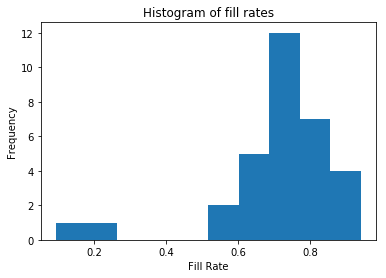

In [13]:
plt.hist(MSA_shifts['FILL_RATE'], bins=10) 
plt.title("Histogram of fill rates")
plt.xlabel("Fill Rate")
plt.ylabel("Frequency")
plt.show()

In [14]:
np.mean(MSA_shifts['FILL_RATE'])

0.706187520316451

In [15]:
describe(MSA_shifts['FILL_RATE'])

DescribeResult(nobs=32, minmax=(0.09474590869939707, 0.9402713965167219), mean=0.7061875203164513, variance=0.028514181411463974, skewness=-1.9751395114989212, kurtosis=4.765106819708422)

In [16]:
normaltest(MSA_shifts['FILL_RATE'])

NormaltestResult(statistic=26.901425690957748, pvalue=1.4402226396218626e-06)

In [17]:
MSA_month_shifts = pd.pivot_table(shifts, index = ['MSA','MONTH'], aggfunc=np.sum)

In [18]:
month_fill_rate = MSA_month_shifts['FILLED_SHIFTS'] / MSA_month_shifts['POSTED_SHIFTS']
MSA_month_shifts['FILL_RATE'] = month_fill_rate
MSA_month_shifts

FILLED_SHIFTS  POSTED_SHIFTS  \
MSA                                  MONTH                                      
Atlanta-Sandy Springs-Alpharetta, GA 2022-09-01          992.0         1655.0   
                                     2022-10-01         1675.0         2370.0   
                                     2022-11-01         1802.0         2241.0   
Boston-Cambridge-Newton, MA-NH       2022-09-01          369.0          688.0   
                                     2022-10-01          659.0         1115.0   
                                     2022-11-01          832.0         1282.0   
Canton-Massillon, OH                 2022-09-01          279.0          316.0   
                                     2022-10-01          260.0          303.0   
                                     2022-11-01          273.0          495.0   
Chico, CA                            2022-09-01           18.0           47.0   
                                     2022-10-01          587.0         1199.0   
                                     2022-11-01          751.0         1345.0   
Cincinnati, OH-KY-IN                 2022-09-01          257.0          446.0   
                                     2022-10-01          688.0         1035.0   
                                     2022-11-01          889.0         1332.0   
Columbus, OH                         2022-09-01          564.0          721.0   
                                     2022-10-01          468.0          621.0   
                                     2022-11-01          569.0          607.0   
Dallas-Fort Worth-Arlington, TX      2022-09-01         1541.0         1904.0   
                                     2022-10-01         1580.0         2082.0   
                                     2022-11-01         1244.0         1643.0   
Denver-Aurora-Lakewood, CO           2022-09-01          500.0          556.0   
                                     2022-10-01          658.0          705.0   
                                     2022-11-01          352.0          607.0   
Detroit-Warren-Dearborn, MI          2022-09-01          357.0          574.0   
                                     2022-10-01          230.0          286.0   
                                     2022-11-01          138.0          224.0   
Grand Rapids-Kentwood, MI            2022-09-01          215.0          413.0   
                                     2022-10-01          436.0          679.0   
                                     2022-11-01          324.0          533.0   
...                                                        ...            ...   
Rapid City, SD                       2022-11-01           30.0          140.0   
Riverside-San Bernardino-Ontario, CA 2022-09-01          921.0         1389.0   
                                     2022-10-01          805.0         1223.0   
                                     2022-11-01         1004.0         1340.0   
Sacramento-Roseville-Folsom, CA      2022-09-01         1860.0         2380.0   
                                     2022-10-01         1914.0         2469.0   
                                     2022-11-01         1623.0         2733.0   
San Antonio-New Braunfels, TX        2022-09-01          373.0          505.0   
                                     2022-10-01          308.0          443.0   
                                     2022-11-01          154.0          217.0   
San Francisco-Oakland-Berkeley, CA   2022-09-01         3126.0         3254.0   
                                     2022-10-01         2957.0         3158.0   
                                     2022-11-01         2717.0         2947.0   
San Jose-Sunnyvale-Santa Clara, CA   2022-09-01          475.0          672.0   
                                     2022-10-01          652.0          692.0   
                                     2022-11-01          747.0          928.0   
Sioux Falls, SD                      2022-10-01           83.0          379.0   

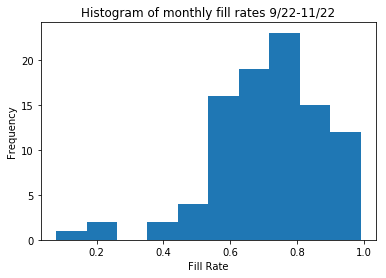

In [53]:
plt.hist(MSA_month_shifts['FILL_RATE'], bins=10) 
plt.title("Histogram of monthly fill rates 9/22-11/22")
plt.xlabel("Fill Rate")
plt.ylabel("Frequency")
plt.show()

In [38]:
unstacked = MSA_month_shifts.unstack(0)

In [42]:
unstacked

FILLED_SHIFTS  \
MSA        Atlanta-Sandy Springs-Alpharetta, GA   
MONTH                                             
2022-09-01                                992.0   
2022-10-01                               1675.0   
2022-11-01                               1802.0   

                                                                          \
MSA        Boston-Cambridge-Newton, MA-NH Canton-Massillon, OH Chico, CA   
MONTH                                                                      
2022-09-01                          369.0                279.0      18.0   
2022-10-01                          659.0                260.0     587.0   
2022-11-01                          832.0                273.0     751.0   

                                                                              \
MSA        Cincinnati, OH-KY-IN Columbus, OH Dallas-Fort Worth-Arlington, TX   
MONTH                                                                          
2022-09-01                257.0        564.0                          1541.0   
2022-10-01                688.0        468.0                          1580.0   
2022-11-01                889.0        569.0                          1244.0   

                                                                   \
MSA        Denver-Aurora-Lakewood, CO Detroit-Warren-Dearborn, MI   
MONTH                                                               
2022-09-01                      500.0                       357.0   
2022-10-01                      658.0                       230.0   
2022-11-01                      352.0                       138.0   

                                      ...  \
MSA        Grand Rapids-Kentwood, MI  ...   
MONTH                                 ...   
2022-09-01                     215.0  ...   
2022-10-01                     436.0  ...   
2022-11-01                     324.0  ...   

                                      FILL_RATE  \
MSA        Riverside-San Bernardino-Ontario, CA   
MONTH                                             
2022-09-01                             0.663067   
2022-10-01                             0.658217   
2022-11-01                             0.749254   

                                                                          \
MSA        Sacramento-Roseville-Folsom, CA San Antonio-New Braunfels, TX   
MONTH                                                                      
2022-09-01                        0.781513                      0.738614   
2022-10-01                        0.775213                      0.695260   
2022-11-01                        0.593853                      0.709677   

                                               \
MSA        San Francisco-Oakland-Berkeley, CA   
MONTH                                           
2022-09-01                           0.960664   
2022-10-01                           0.936352   
2022-11-01                           0.921955   

                                                                               \
MSA        San Jose-Sunnyvale-Santa Clara, CA Sioux Falls, SD Springfield, MA   
MONTH                                                                           
2022-09-01                           0.706845             NaN        0.418060   
2022-10-01                           0.942197        0.218997        0.542923   
2022-11-01                           0.804957        0.450704        0.729988   

                                                         
MSA        St. Louis, MO-IL Stockton, CA Torrington, CT  
MONTH                                                    
2022-09-01         0.614857     0.614085       0.584527  
2022-10-01         0.683577     0.942197       0.564767  
2022-11-01         0.808608     0.670683       0.990826  

[3 rows x 96 columns]

In [39]:
unstacked.columns

MultiIndex(levels=[['FILLED_SHIFTS', 'POSTED_SHIFTS', 'FILL_RATE'], ['Atlanta-Sandy Springs-Alpharetta, GA', 'Boston-Cambridge-Newton, MA-NH', 'Canton-Massillon, OH', 'Chico, CA', 'Cincinnati, OH-KY-IN', 'Columbus, OH', 'Dallas-Fort Worth-Arlington, TX', 'Denver-Aurora-Lakewood, CO', 'Detroit-Warren-Dearborn, MI', 'Grand Rapids-Kentwood, MI', 'Hartford-East Hartford-Middletown, CT', 'Kansas City, MO-KS', 'Las Vegas-Henderson-Paradise, NV', 'Los Angeles-Long Beach-Anaheim, CA', 'Louisville/Jefferson County, KY-IN', 'Minneapolis-St. Paul-Bloomington, MN-WI', 'Nashville-Davidson--Murfreesboro--Franklin, TN', 'New York-Newark-Jersey City, NY-NJ-PA', 'Phoenix-Mesa-Chandler, AZ', 'Pittsburgh, PA', 'Portland-Vancouver-Hillsboro, OR-WA', 'Rapid City, SD', 'Riverside-San Bernardino-Ontario, CA', 'Sacramento-Roseville-Folsom, CA', 'San Antonio-New Braunfels, TX', 'San Francisco-Oakland-Berkeley, CA', 'San Jose-Sunnyvale-Santa Clara, CA', 'Sioux Falls, SD', 'Springfield, MA', 'St. Louis, MO-IL', 

In [58]:
la_fill = unstacked['FILL_RATE']['Los Angeles-Long Beach-Anaheim, CA']
nash_fill = unstacked['FILL_RATE']['Nashville-Davidson--Murfreesboro--Franklin, TN']

In [50]:
la

MONTH
2022-09-01    0.864856
2022-10-01    0.876204
2022-11-01    0.925462
Name: Los Angeles-Long Beach-Anaheim, CA, dtype: float64

In [48]:
la[0]

0.8648562300319489

In [54]:
avg_fill = MSA_month_shifts['FILL_RATE'].mean()

In [55]:
stats.ttest_1samp(la, avg_fill)

Ttest_1sampResult(statistic=9.37787209379777, pvalue=0.011180470504423933)

In [59]:
nash_fill

MONTH
2022-09-01    0.520677
2022-10-01    0.654719
2022-11-01    0.762926
Name: Nashville-Davidson--Murfreesboro--Franklin, TN, dtype: float64

In [60]:
stats.ttest_1samp(nash_fill, avg_fill)

Ttest_1sampResult(statistic=-0.9747203305801175, pvalue=0.4325035509924777)

In [61]:
unstacked

FILLED_SHIFTS  \
MSA        Atlanta-Sandy Springs-Alpharetta, GA   
MONTH                                             
2022-09-01                                992.0   
2022-10-01                               1675.0   
2022-11-01                               1802.0   

                                                                          \
MSA        Boston-Cambridge-Newton, MA-NH Canton-Massillon, OH Chico, CA   
MONTH                                                                      
2022-09-01                          369.0                279.0      18.0   
2022-10-01                          659.0                260.0     587.0   
2022-11-01                          832.0                273.0     751.0   

                                                                              \
MSA        Cincinnati, OH-KY-IN Columbus, OH Dallas-Fort Worth-Arlington, TX   
MONTH                                                                          
2022-09-01                257.0        564.0                          1541.0   
2022-10-01                688.0        468.0                          1580.0   
2022-11-01                889.0        569.0                          1244.0   

                                                                   \
MSA        Denver-Aurora-Lakewood, CO Detroit-Warren-Dearborn, MI   
MONTH                                                               
2022-09-01                      500.0                       357.0   
2022-10-01                      658.0                       230.0   
2022-11-01                      352.0                       138.0   

                                      ...  \
MSA        Grand Rapids-Kentwood, MI  ...   
MONTH                                 ...   
2022-09-01                     215.0  ...   
2022-10-01                     436.0  ...   
2022-11-01                     324.0  ...   

                                      FILL_RATE  \
MSA        Riverside-San Bernardino-Ontario, CA   
MONTH                                             
2022-09-01                             0.663067   
2022-10-01                             0.658217   
2022-11-01                             0.749254   

                                                                          \
MSA        Sacramento-Roseville-Folsom, CA San Antonio-New Braunfels, TX   
MONTH                                                                      
2022-09-01                        0.781513                      0.738614   
2022-10-01                        0.775213                      0.695260   
2022-11-01                        0.593853                      0.709677   

                                               \
MSA        San Francisco-Oakland-Berkeley, CA   
MONTH                                           
2022-09-01                           0.960664   
2022-10-01                           0.936352   
2022-11-01                           0.921955   

                                                                               \
MSA        San Jose-Sunnyvale-Santa Clara, CA Sioux Falls, SD Springfield, MA   
MONTH                                                                           
2022-09-01                           0.706845             NaN        0.418060   
2022-10-01                           0.942197        0.218997        0.542923   
2022-11-01                           0.804957        0.450704        0.729988   

                                                         
MSA        St. Louis, MO-IL Stockton, CA Torrington, CT  
MONTH                                                    
2022-09-01         0.614857     0.614085       0.584527  
2022-10-01         0.683577     0.942197       0.564767  
2022-11-01         0.808608     0.670683       0.990826  

[3 rows x 96 columns]

In [71]:
MSA_RQ = pd.pivot_table(shifts, index = ['MSA', 'AGENT_REQ'], aggfunc=np.sum)
MSA_RQ

FILLED_SHIFTS  POSTED_SHIFTS
MSA                                   AGENT_REQ                              
Atlanta-Sandy Springs-Alpharetta, GA  CNA               2714.0         4124.0
                                      LVN               1710.0         2089.0
                                      RN                  45.0           53.0
Boston-Cambridge-Newton, MA-NH        CNA               1028.0         1885.0
                                      LVN                454.0          734.0
                                      RN                 378.0          466.0
Canton-Massillon, OH                  CNA                649.0          906.0
                                      LVN                 74.0           95.0
                                      RN                  89.0          113.0
Chico, CA                             CNA                956.0         1736.0
                                      LVN                400.0          855.0
Cincinnati, OH-KY-IN                  CNA               1013.0         1694.0
                                      LVN                722.0          963.0
                                      RN                  99.0          156.0
Columbus, OH                          CNA                986.0         1217.0
                                      LVN                561.0          656.0
                                      RN                  54.0           76.0
Dallas-Fort Worth-Arlington, TX       CNA               2596.0         3569.0
                                      LVN               1420.0         1616.0
                                      RN                 349.0          444.0
Denver-Aurora-Lakewood, CO            CNA               1118.0         1409.0
                                      LVN                296.0          341.0
                                      RN                  96.0          118.0
Detroit-Warren-Dearborn, MI           CNA                525.0          832.0
                                      LVN                195.0          246.0
                                      RN                   5.0            6.0
Grand Rapids-Kentwood, MI             CNA                838.0         1383.0
                                      LVN                137.0          241.0
                                      RN                   0.0            1.0
Hartford-East Hartford-Middletown, CT CNA               1266.0         1871.0
...                                                        ...            ...
Rapid City, SD                        LVN                 26.0          342.0
                                      RN                   0.0          179.0
Riverside-San Bernardino-Ontario, CA  CNA               1800.0         2821.0
                                      LVN                809.0         1000.0
                                      RN                 121.0          131.0
Sacramento-Roseville-Folsom, CA       CNA               3890.0         4925.0
                                      LVN               1251.0         2339.0
                                      RN                 256.0          318.0
San Antonio-New Braunfels, TX         CNA                449.0          673.0
                                      LVN                377.0          478.0
                                      RN                   9.0           14.0
San Francisco-Oakland-Berkeley, CA    CNA               6337.0         6575.0
                                      LVN               1962.0         2047.0
                                      RN                 501.0          737.0
San Jose-Sunnyvale-Santa Clara, CA    CNA                930.0         1088.0
                                      LVN                841.0         1061.0
                                      RN                 103.0          143.0
Sioux Falls, SD                       CNA                115.0          450.0
Springfield, MA                       CNA                569.0         

In [72]:
month_fill_rate = MSA_RQ['FILLED_SHIFTS'] / MSA_RQ['POSTED_SHIFTS']
MSA_RQ['FILL_RATE'] = month_fill_rate
MSA_RQ

FILLED_SHIFTS  POSTED_SHIFTS  \
MSA                                   AGENT_REQ                                 
Atlanta-Sandy Springs-Alpharetta, GA  CNA               2714.0         4124.0   
                                      LVN               1710.0         2089.0   
                                      RN                  45.0           53.0   
Boston-Cambridge-Newton, MA-NH        CNA               1028.0         1885.0   
                                      LVN                454.0          734.0   
                                      RN                 378.0          466.0   
Canton-Massillon, OH                  CNA                649.0          906.0   
                                      LVN                 74.0           95.0   
                                      RN                  89.0          113.0   
Chico, CA                             CNA                956.0         1736.0   
                                      LVN                400.0          855.0   
Cincinnati, OH-KY-IN                  CNA               1013.0         1694.0   
                                      LVN                722.0          963.0   
                                      RN                  99.0          156.0   
Columbus, OH                          CNA                986.0         1217.0   
                                      LVN                561.0          656.0   
                                      RN                  54.0           76.0   
Dallas-Fort Worth-Arlington, TX       CNA               2596.0         3569.0   
                                      LVN               1420.0         1616.0   
                                      RN                 349.0          444.0   
Denver-Aurora-Lakewood, CO            CNA               1118.0         1409.0   
                                      LVN                296.0          341.0   
                                      RN                  96.0          118.0   
Detroit-Warren-Dearborn, MI           CNA                525.0          832.0   
                                      LVN                195.0          246.0   
                                      RN                   5.0            6.0   
Grand Rapids-Kentwood, MI             CNA                838.0         1383.0   
                                      LVN                137.0          241.0   
                                      RN                   0.0            1.0   
Hartford-East Hartford-Middletown, CT CNA               1266.0         1871.0   
...                                                        ...            ...   
Rapid City, SD                        LVN                 26.0          342.0   
                                      RN                   0.0          179.0   
Riverside-San Bernardino-Ontario, CA  CNA               1800.0         2821.0   
                                      LVN                809.0         1000.0   
                                      RN                 121.0          131.0   
Sacramento-Roseville-Folsom, CA       CNA               3890.0         4925.0   
                                      LVN               1251.0         2339.0   
                                      RN                 256.0          318.0   
San Antonio-New Braunfels, TX         CNA                449.0          673.0   
                                      LVN                377.0          478.0   
                                      RN                   9.0           14.0   
San Francisco-Oakland-Berkeley, CA    CNA               6337.0         6575.0   
                                      LVN               1962.0         2047.0   
                                      RN                 501.0          737.0   
San Jose-Sunnyvale-Santa Clara, CA    CNA                930.0         1088.0   
                                      LVN                841.0         1061.0   
                                      RN                 103.0          143.0   

In [74]:
MSA_RQ.unstack(1)

FILLED_SHIFTS                  \
AGENT_REQ                                                CNA     LVN      RN   
MSA                                                                            
Atlanta-Sandy Springs-Alpharetta, GA                  2714.0  1710.0    45.0   
Boston-Cambridge-Newton, MA-NH                        1028.0   454.0   378.0   
Canton-Massillon, OH                                   649.0    74.0    89.0   
Chico, CA                                              956.0   400.0     NaN   
Cincinnati, OH-KY-IN                                  1013.0   722.0    99.0   
Columbus, OH                                           986.0   561.0    54.0   
Dallas-Fort Worth-Arlington, TX                       2596.0  1420.0   349.0   
Denver-Aurora-Lakewood, CO                            1118.0   296.0    96.0   
Detroit-Warren-Dearborn, MI                            525.0   195.0     5.0   
Grand Rapids-Kentwood, MI                              838.0   137.0     0.0   
Hartford-East Hartford-Middletown, CT                 1266.0   416.0    67.0   
Kansas City, MO-KS                                     868.0   249.0   118.0   
Las Vegas-Henderson-Paradise, NV                      1769.0   728.0     8.0   
Los Angeles-Long Beach-Anaheim, CA                   25655.0  9036.0  7421.0   
Louisville/Jefferson County, KY-IN                    2025.0   755.0    56.0   
Minneapolis-St. Paul-Bloomington, MN-WI               2529.0   301.0   257.0   
Nashville-Davidson--Murfreesboro--Franklin, TN        1063.0   267.0   100.0   
New York-Newark-Jersey City, NY-NJ-PA                 5981.0  2684.0   532.0   
Phoenix-Mesa-Chandler, AZ                             1179.0   395.0   129.0   
Pittsburgh, PA                                        5391.0  2586.0  1090.0   
Portland-Vancouver-Hillsboro, OR-WA                   4613.0   692.0   326.0   
Rapid City, SD                                          84.0    26.0     0.0   
Riverside-San Bernardino-Ontario, CA                  1800.0   809.0   121.0   
Sacramento-Roseville-Folsom, CA                       3890.0  1251.0   256.0   
San Antonio-New Braunfels, TX                          449.0   377.0     9.0   
San Francisco-Oakland-Berkeley, CA                    6337.0  1962.0   501.0   
San Jose-Sunnyvale-Santa Clara, CA                     930.0   841.0   103.0   
Sioux Falls, SD                                        115.0     NaN     NaN   
Springfield, MA                                        569.0   241.0   160.0   
St. Louis, MO-IL                                      1405.0   774.0    37.0   
Stockton, CA                                           698.0   333.0    10.0   
Torrington, CT                                         723.0   125.0     6.0   

                                               POSTED_SHIFTS                  \
AGENT_REQ                                                CNA     LVN      RN   
MSA                                                                            
Atlanta-Sandy Springs-Alpharetta, GA                  4124.0  2089.0    53.0   
Boston-Cambridge-Newton, MA-NH                        1885.0   734.0   466.0   
Canton-Massillon, OH                                   906.0    95.0   113.0   
Chico, CA                                             1736.0   855.0     NaN   
Cincinnati, OH-KY-IN                                  1694.0   963.0   156.0   
Columbus, OH                                          1217.0   656.0    76.0   
Dallas-Fort Worth-Arlington, TX                       3569.0  1616.0   444.0   
Denver-Aurora-Lakewood, CO                            1409.0   341.0   118.0   
Detroit-Warren-Dearborn, MI                            832.0   246.0     6.0   
Grand Rapids-Kentwood, MI                             1383.0   241.0     1.0   
Hartford-East Hartford-Middletown, CT                 1871.0   507.0    86.0   
Kansas City, MO-KS                                     963.0   301.0   154.0   
Las Vegas-Henderson-Paradise, NV              

In [76]:
MSA_shifts['POSTED_SHIFTS'].mean()

4921.59375

In [78]:
unstacked['POSTED_SHIFTS']

MSA,"Atlanta-Sandy Springs-Alpharetta, GA","Boston-Cambridge-Newton, MA-NH","Canton-Massillon, OH","Chico, CA","Cincinnati, OH-KY-IN","Columbus, OH","Dallas-Fort Worth-Arlington, TX","Denver-Aurora-Lakewood, CO","Detroit-Warren-Dearborn, MI","Grand Rapids-Kentwood, MI",...,"Riverside-San Bernardino-Ontario, CA","Sacramento-Roseville-Folsom, CA","San Antonio-New Braunfels, TX","San Francisco-Oakland-Berkeley, CA","San Jose-Sunnyvale-Santa Clara, CA","Sioux Falls, SD","Springfield, MA","St. Louis, MO-IL","Stockton, CA","Torrington, CT"
MONTH,,,,,,,,,,,,,,,,,,,,,
2022-09-01,1655.0,688.0,316.0,47.0,446.0,721.0,1904.0,556.0,574.0,413.0,...,1389.0,2380.0,505.0,3254.0,672.0,NaN,299.0,875.0,355.0,349.0
2022-10-01,2370.0,1115.0,303.0,1199.0,1035.0,621.0,2082.0,705.0,286.0,679.0,...,1223.0,2469.0,443.0,3158.0,692.0,379.0,431.0,1163.0,519.0,386.0
2022-11-01,2241.0,1282.0,495.0,1345.0,1332.0,607.0,1643.0,607.0,224.0,533.0,...,1340.0,2733.0,217.0,2947.0,928.0,71.0,837.0,1092.0,498.0,436.0
